# Pridicting Car Prices #

This project uses K-Nearest Neighbour algorithm to predict car prices.

Includes:
* Initial analysis and data cleaning 
* Data normalisation to prepare for ML
* Trying Different Hyperparameters and different features to find the most optimal
* Conclusion of which features and hyperparameters present with the smallest error i.e. the best to use as a model to predict prices


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
cars = pd.read_csv('imports-85.data')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
3              204 non-null int64
?              204 non-null object
alfa-romero    204 non-null object
gas            204 non-null object
std            204 non-null object
two            204 non-null object
convertible    204 non-null object
rwd            204 non-null object
front          204 non-null object
88.60          204 non-null float64
168.80         204 non-null float64
64.10          204 non-null float64
48.80          204 non-null float64
2548           204 non-null int64
dohc           204 non-null object
four           204 non-null object
130            204 non-null int64
mpfi           204 non-null object
3.47           204 non-null object
2.68           204 non-null object
9.00           204 non-null float64
111            204 non-null object
5000           204 non-null object
21             204 non-null int64
27             204 non-null int64
13495          204 n

In [85]:
cars.head(2)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [86]:
cols = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors","body_style","drive_wheels", "engine_location", "wheel_base","length", "width","height", "curb_weight","engine_type", "num_cylinders","engine_size", "fuel_system","bore", "stroke","compression_ratio", "horsepower","peak_rpm","city_mpg", "highway_mpg","price"]

cars = pd.read_csv('imports-85.data', names=cols)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [87]:
cars.describe(include='O')

,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [88]:
pd.set_option('display.max_columns', None)

cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning ##

In [89]:
# replace normalized_losses '?' with NaN
# replace columns with numeric values
# Note items with NaN cannot be converted to int hence until NaN are removed or filled they will be converted to integer
cars['normalized_losses'] = cars['normalized_losses'].replace('?', np.nan).astype(float)

# convert following columns to numeric
# bore to float
cars['bore'] = cars['bore'].replace('?', np.nan).astype(float)

# stroke to float
cars['stroke'] = cars['stroke'].replace('?', np.nan).astype(float)

# horspower to float 
cars['horsepower'] = cars['horsepower'].replace('?', np.nan).astype(float)

# peak_rpm to float for now
cars['peak_rpm'] = cars['peak_rpm'].replace('?', np.nan).astype(float)

# city and highway mpg for now
cars['city_mpg'] = cars['city_mpg'].replace('?', np.nan).astype(float)
cars['highway_mpg'] = cars['highway_mpg'].replace('?', np.nan).astype(float)

# price and highway mpg for now
cars['price'] = cars['price'].replace('?', np.nan).astype(float)

cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [90]:
cars.describe(include=[np.number])

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [91]:
# check NaN (missing values)
cars.isna().any(axis=1).value_counts()

False    160
True      45
dtype: int64

In [92]:
cars.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

## Dealing with NaN for Numeric Columns ##

1. Remove 4 rows for pricing as this is target column for training
2. The rest of the numeric columns replace with mean values

Also drop 'symboling' as this is a derived value

In [93]:
# remove 4 rows for pricing as this is target column for training
cars.dropna(subset=['price'], inplace=True)

In [97]:
cars.drop('symboling', axis=1, inplace=True)

In [99]:
# replace NaN with mean values for normalized_losses
cars.fillna(cars.mean(), inplace=True)

In [101]:
# check if there are any NaN
cars.isna().any(axis=1).value_counts()

False    201
dtype: int64

In [102]:
cars.isna().sum()

normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## Scaling Numeric Data 0 to 1 ##

In [103]:
from sklearn import preprocessing

# array_to_scale = cars[['normalized_losses']]
cars_scaled = cars.copy()
cols_to_scale = [ c for c in cars_scaled.select_dtypes([np.number]).columns if c != 'price']
array_to_scale = cars_scaled.loc[:, cols_to_scale].values
min_max_scaler = preprocessing.MinMaxScaler()
transformed = min_max_scaler.fit_transform(array_to_scale)

cars_scaled.loc[:,cols_to_scale] = transformed

# remove non-numeric columns
cols_to_remove = cars_scaled.select_dtypes(exclude=[np.number]).columns
cars_scaled = cars_scaled.drop(columns=cols_to_remove, axis=1)

cars_scaled

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


## Univariate Model ##

In [104]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(features, target, df):
    knn = KNeighborsRegressor(algorithm='brute')
    
    # randomise
    np.random.seed(1)
    df = df.iloc[np.random.permutation(df.shape[0])]
    # split 50/50
    train_set = cars_scaled.iloc[:int(cars_scaled.shape[0]/2)]
    test_set = cars_scaled.iloc[int(cars_scaled.shape[0]/2):]

    
    # train

    knn.fit(train_set[features], train_set[target])
    
    # predict
    prediction = knn.predict(test_set[features])
    
    # calculate rmse

    rmse = (mean_squared_error(test_set[target],prediction))**(1/2)
    
    return rmse
    

In [105]:
list_features = [ c for c in cars_scaled.select_dtypes([np.number]).columns if c != 'price']
target = ['price']
df = cars_scaled

rmse_results = dict()
for feature in list_features:
    rmse_results[feature] = knn_train_test([feature], target, df)
    
sorted(rmse_results.items(), key=lambda x:x[1])

[('engine_size', 4165.436222957296),
 ('highway_mpg', 4191.531672407126),
 ('horsepower', 4339.714520610318),
 ('city_mpg', 4857.333584436533),
 ('curb_weight', 5168.998053322086),
 ('width', 7233.242971445131),
 ('compression_ratio', 7459.416482315065),
 ('normalized_losses', 8374.291758485468),
 ('length', 8418.722543413003),
 ('stroke', 8813.421290821456),
 ('peak_rpm', 9541.776737947272),
 ('wheel_base', 9717.114822459975),
 ('height', 10841.524435134746),
 ('bore', 13576.906166744839)]

### The Best Performing Column ###

The best performing column is engine_size, closely followed by highway_mpg, horsepower and city_mpg

## Univariate Model testing with Hyperparameter k ##

In [106]:
def knn_train_test(k, features, target, df):
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    
    # randomise
    np.random.seed(1)
    df = df.iloc[np.random.permutation(df.shape[0])]
    # split 50/50
    train_set = cars_scaled.iloc[:int(cars_scaled.shape[0]/2)]
    test_set = cars_scaled.iloc[int(cars_scaled.shape[0]/2):]
    
    # train
#     print(features)
    knn.fit(train_set[features], train_set[target])
    
    # predict
    prediction = knn.predict(test_set[features])
    
    # calculate rmse

    rmse = (mean_squared_error(test_set[target],prediction))**(1/2)
    
    return rmse

In [110]:
list_features = [ c for c in cars_scaled.select_dtypes([np.number]).columns if c != 'price']
target = ['price']
df = cars_scaled
ks = [1,3,5,7,9]

rmse_results = dict()

for feature in list_features:
    rmse_per_k = []
    for k in ks:
        rmse_per_k.append(knn_train_test(k, [feature], target, df))
    rmse_results[feature] = rmse_per_k

df_rmse_results = pd.DataFrame.from_dict(rmse_results, orient='index')
df_rmse_results.rename(columns={0:'RMSE-K1', 1:'RMSE-K3', 2:'RMSE-K5', 3:'RMSE-K7', 4:'RMSE-K9'}, inplace=True)

df_rmse_results

,RMSE-K1,RMSE-K3,RMSE-K5,RMSE-K7,RMSE-K9
width,8090.058091,7123.019732,7233.242971,6668.331210,6526.150945
bore,13076.169271,14400.477832,13576.906167,11198.043817,10692.963377
engine_size,5193.527357,4798.910047,4165.436223,4109.706906,3999.253745
length,10052.002720,8157.923626,8418.722543,8139.208724,7645.710110
highway_mpg,5522.748289,4674.221478,4191.531672,4348.465269,4051.202838
city_mpg,4250.934380,4695.235719,4857.333584,4746.674499,4774.889342
compression_ratio,8021.850793,8473.082217,7459.416482,7344.525768,7309.384159
stroke,10244.443627,11529.562523,8813.421291,6825.668148,7726.413385
height,15028.406549,11336.145678,10841.524435,9866.415113,8973.246999
horsepower,7075.037770,5465.591285,4339.714521,3865.311464,3540.389030


In [111]:
df_rmse_results['optimal k'] = df_rmse_results.idxmin(axis=1)
df_rmse_results

,RMSE-K1,RMSE-K3,RMSE-K5,RMSE-K7,RMSE-K9,optimal k
width,8090.058091,7123.019732,7233.242971,6668.331210,6526.150945,RMSE-K9
bore,13076.169271,14400.477832,13576.906167,11198.043817,10692.963377,RMSE-K9
engine_size,5193.527357,4798.910047,4165.436223,4109.706906,3999.253745,RMSE-K9
length,10052.002720,8157.923626,8418.722543,8139.208724,7645.710110,RMSE-K9
highway_mpg,5522.748289,4674.221478,4191.531672,4348.465269,4051.202838,RMSE-K9
city_mpg,4250.934380,4695.235719,4857.333584,4746.674499,4774.889342,RMSE-K1
compression_ratio,8021.850793,8473.082217,7459.416482,7344.525768,7309.384159,RMSE-K9
stroke,10244.443627,11529.562523,8813.421291,6825.668148,7726.413385,RMSE-K7
height,15028.406549,11336.145678,10841.524435,9866.415113,8973.246999,RMSE-K9
horsepower,7075.037770,5465.591285,4339.714521,3865.311464,3540.389030,RMSE-K9


The optimal K parameter ranges between 1 and 9 depending on the features.  

Even for the top features that seem to be close such as city and highway mpg - the opticmal K parameter is radically different.

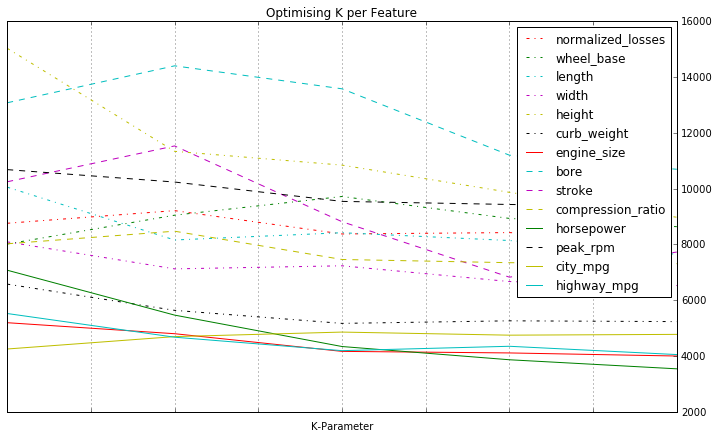

In [112]:
%matplotlib inline

plt.figure(figsize=(12,7))
plt.title('Optimising K per Feature')
plt.ylabel('RMSE')
plt.xlabel('K-Parameter')

ax1 = df_rmse_results.loc['normalized_losses','RMSE-K1':'RMSE-K9'].plot(c='r', linestyle='-.', grid=True, secondary_y=True, label='normalized_losses')
ax2 = df_rmse_results.loc['wheel_base','RMSE-K1':'RMSE-K9'].plot(c='g', linestyle='-.', grid=True, secondary_y=True, label='wheel_base')
ax3 = df_rmse_results.loc['length','RMSE-K1':'RMSE-K9'].plot(c='c', linestyle='-.', grid=True, secondary_y=True, label='length')
ax4 = df_rmse_results.loc['width','RMSE-K1':'RMSE-K9'].plot(c='m', linestyle='-.', grid=True, secondary_y=True, label='width')
ax5 = df_rmse_results.loc['height','RMSE-K1':'RMSE-K9'].plot(c='y', linestyle='-.', grid=True, secondary_y=True, label='height')
ax6 = df_rmse_results.loc['curb_weight','RMSE-K1':'RMSE-K9'].plot(c='k', linestyle='-.', grid=True, secondary_y=True, label='curb_weight')
ax7 = df_rmse_results.loc['engine_size','RMSE-K1':'RMSE-K9'].plot(c='r', linestyle='-', grid=True, secondary_y=True, label='engine_size')
ax8 = df_rmse_results.loc['bore','RMSE-K1':'RMSE-K9'].plot(c='c', linestyle='--', grid=True, secondary_y=True, label='bore')
ax9 = df_rmse_results.loc['stroke','RMSE-K1':'RMSE-K9'].plot(c='m', linestyle='--', grid=True, secondary_y=True, label='stroke')
ax10 = df_rmse_results.loc['compression_ratio','RMSE-K1':'RMSE-K9'].plot(c='y', linestyle='--', grid=True, secondary_y=True, label='compression_ratio')
ax11 = df_rmse_results.loc['horsepower','RMSE-K1':'RMSE-K9'].plot(c='g', linestyle='-', grid=True, secondary_y=True, label='horsepower')
ax12 = df_rmse_results.loc['peak_rpm','RMSE-K1':'RMSE-K9'].plot(c='k', linestyle='--', grid=True, secondary_y=True, label='peak_rpm')
ax13 = df_rmse_results.loc['city_mpg','RMSE-K1':'RMSE-K9'].plot(c='y', linestyle='-', grid=True, secondary_y=True, label='city_mpg')
ax14 = df_rmse_results.loc['highway_mpg','RMSE-K1':'RMSE-K9'].plot(c='c', linestyle='-', grid=True, secondary_y=True, label='highway_mpg')
plt.legend()
plt.show()

## Multivariate Model Testing with Top Features ##

The following top 5 best features identified from the previous exercise:

* horsepower
* engine_size
* highway_mpg
* city_mpg
* curb_weight



Test with 2, 3, 4, 5 best features.



In [123]:
def knn_train_test(k, features, target, df):
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    
    # randomise
    np.random.seed(1)
    df = df.iloc[np.random.permutation(df.shape[0])]
    # split 50/50
    train_set = cars_scaled.iloc[:int(cars_scaled.shape[0]/2)]
    test_set = cars_scaled.iloc[int(cars_scaled.shape[0]/2):]
    
    # train to different feature set
    rmse_per_trial = dict()
    for trial in range(2,6):
        knn.fit(train_set[features[:trial]], train_set[target])   
        # predict
        prediction = knn.predict(test_set[features[:trial]])
        # calculate rmse
        rmse_per_trial[trial] = (mean_squared_error(test_set[target],prediction))**(1/2)
    df_rmse_per_trial = pd.DataFrame.from_dict(rmse_per_trial, orient='index')
    df_rmse_per_trial = df_rmse_per_trial.reset_index()
    df_rmse_per_trial = df_rmse_per_trial.rename(columns={'index':'Features Tried', 0:'RMSE'})
    df_rmse_per_trial.index += 1
    return df_rmse_per_trial

In [124]:
list_features = ['horsepower','engine_size','highway_mpg','city_mpg','curb_weight']
target = ['price']
df = cars_scaled


results = knn_train_test(5, list_features, target, df)

results

,Features Tried,RMSE
1,2,3500.065627
2,3,3555.680918
3,4,3526.392807
4,5,3875.683864


The testing showed that model with two features provides minimum error 'horsepower' and 'engine_size' features



## Further Hyperparameter Optimisation on top performing models

We will use top 3 models (2, 3 and 4 features) to further optimise hyperparameter k


In [125]:
def knn_train_test(features, target, df):
    ks = range(1,26)
    # randomise
    np.random.seed(1)
    df = df.iloc[np.random.permutation(df.shape[0])]
    # split 50/50
    train_set = cars_scaled.iloc[:int(cars_scaled.shape[0]/2)]
    test_set = cars_scaled.iloc[int(cars_scaled.shape[0]/2):]
    
    # train to different feature set

    dic_rmse_per_k = dict()
    for k in ks:
        knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
        rmse_per_k = []
        knn.fit(train_set[features], train_set[target])   
        # predict
        prediction = knn.predict(test_set[features])
        # calculate rmse
        rmse_per_k.append((mean_squared_error(test_set[target],prediction))**(1/2))
        dic_rmse_per_k[k] = rmse_per_k
    df_rmse_per_k = pd.DataFrame.from_dict(dic_rmse_per_k, orient='index')

    return df_rmse_per_k

In [159]:
list_features = ['horsepower','engine_size','highway_mpg','city_mpg','curb_weight']
target = ['price']
df = cars_scaled

# use dataframe for ease of working with and displaying results
df_trial_results = pd.DataFrame()

init_df = False
for trial in range(2,5):
    features = list_features[:trial]

    if init_df == False:
        df_trial_results = knn_train_test(features, target, df)
        df_trial_results['features'] = trial
        init_df = True
    else:
        iter_result = pd.DataFrame(knn_train_test(features, target, df))
        iter_result['features'] = trial
        df_trial_results = pd.concat([df_trial_results,iter_result],axis=0)
#         df_trial_results.loc[df_trial_results['features'].isnull(), 'features'] = trial

df_trial_results['features'] = df_trial_results['features'].astype(int)
df_trial_results.reset_index(inplace=True)
df_trial_results.rename(columns={'index':'k-param', 0:'RMSE'}, inplace=True)
df_trial_results = df_trial_results[['features','k-param','RMSE']]


In [160]:
pd.set_option('display.max_rows', None)
df_trial_results

,features,k-param,RMSE
0,2,1,3651.277422
1,2,2,3713.183230
2,2,3,3612.621528
3,2,4,3424.357093
4,2,5,3500.065627
5,2,6,3500.486477
6,2,7,3292.132324
7,2,8,3185.780221
8,2,9,3180.070599
9,2,10,3284.165876


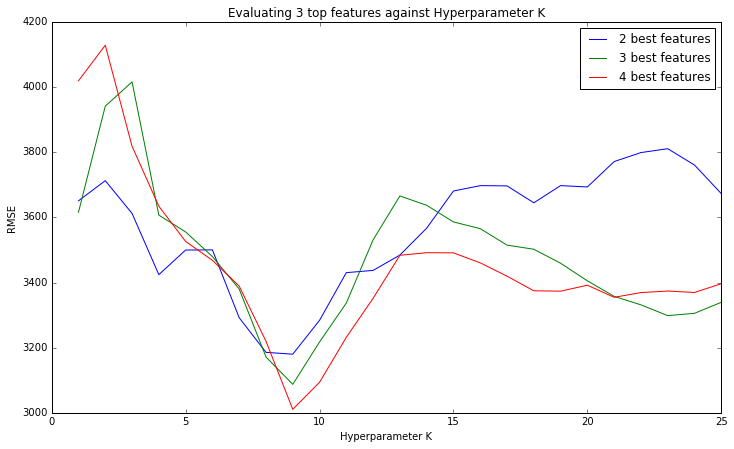

In [161]:
plt.figure(figsize=(12,7))



for trial in range(2,5):
    x = df_trial_results.loc[df_trial_results['features'] == trial, 'k-param']
    y = df_trial_results.loc[df_trial_results['features'] == trial, 'RMSE']
    lbl = ' '.join([str(trial), 'best features'])
    plt.plot(x,y,label=lbl)

plt.xlabel('Hyperparameter K')
plt.ylabel('RMSE')
plt.title('Evaluating 3 top features against Hyperparameter K')
plt.legend()
plt.show()

In [130]:
df_trial_results.loc[df_trial_results['features']==4].sort_values('RMSE').head(3)

,features,k-param,RMSE
58,4,9,3010.626744
59,4,10,3093.725694
57,4,8,3219.967092


Most Optimal model should includes 4 best features ('horsepower','engine_size','highway_mpg','city_mpg') and 9 for k hyperparameter.  The RMSE with this set up gives minimal value of 3010.626744